In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('/kaggle/input/brain-tumor-mri-dataset/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/kaggle/input/brain-tumor-mri-dataset/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())

# Full connect layers

model3.add(Dense(units= 512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.0001, clipvalue=0.5)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

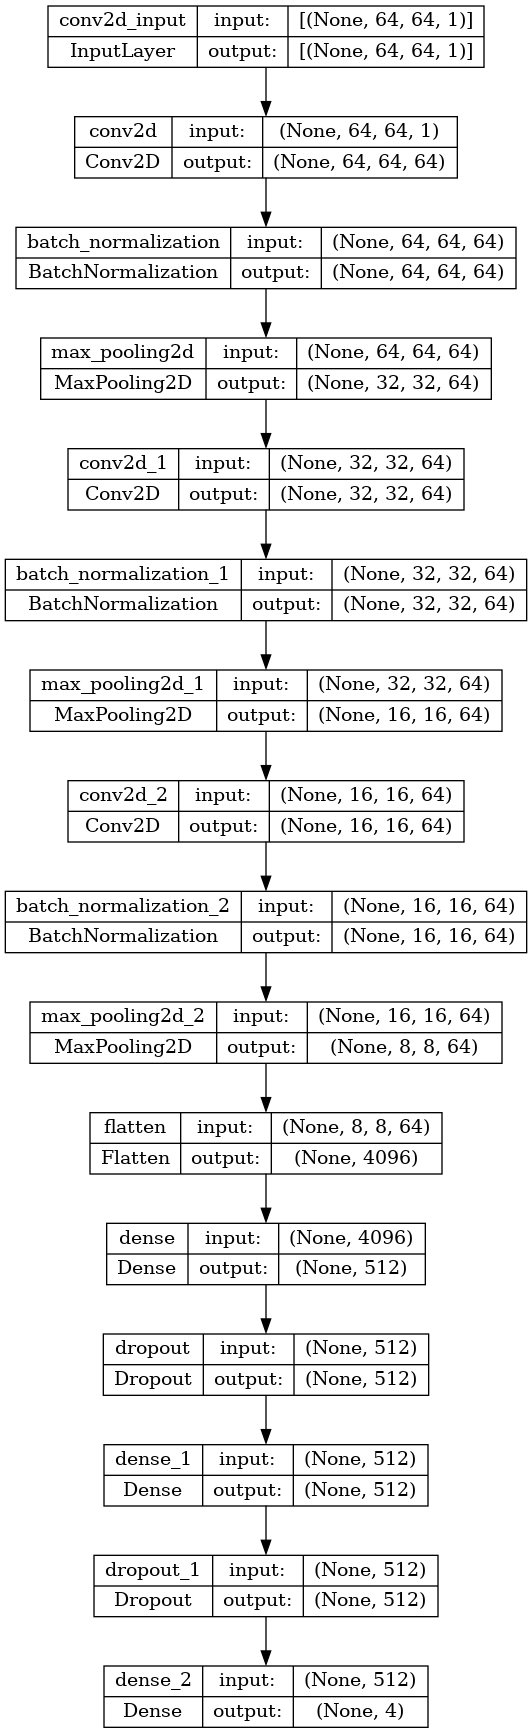

In [5]:
keras.utils.plot_model(model3, show_shapes=True)

In [6]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model3_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model3_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model3_mcp = ModelCheckpoint(filepath = 'model3_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fitting the model
history3 = model3.fit(train, steps_per_epoch=5712//32, epochs=30, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model3_es, model3_rlr, model3_mcp])

Epoch 1/30
178/178 [==============================] - ETA: 0s - loss: 0.9828 - categorical_accuracy: 0.6741
Epoch 1: val_categorical_accuracy improved from -inf to 0.22813, saving model to model3_weights.h5
178/178 [==============================] - 68s 298ms/step - loss: 0.9828 - categorical_accuracy: 0.6741 - val_loss: 2.7766 - val_categorical_accuracy: 0.2281 - lr: 0.0010
Epoch 2/30
178/178 [==============================] - ETA: 0s - loss: 0.5438 - categorical_accuracy: 0.7847
Epoch 2: val_categorical_accuracy improved from 0.22813 to 0.57187, saving model to model3_weights.h5
178/178 [==============================] - 25s 142ms/step - loss: 0.5438 - categorical_accuracy: 0.7847 - val_loss: 1.2556 - val_categorical_accuracy: 0.5719 - lr: 0.0010
Epoch 3/30
178/178 [==============================] - ETA: 0s - loss: 0.4333 - categorical_accuracy: 0.8276
Epoch 3: val_categorical_accuracy improved from 0.57187 to 0.79062, saving model to model3_weights.h5
178/178 [======================

Text(0.5, 1.0, 'Loss on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

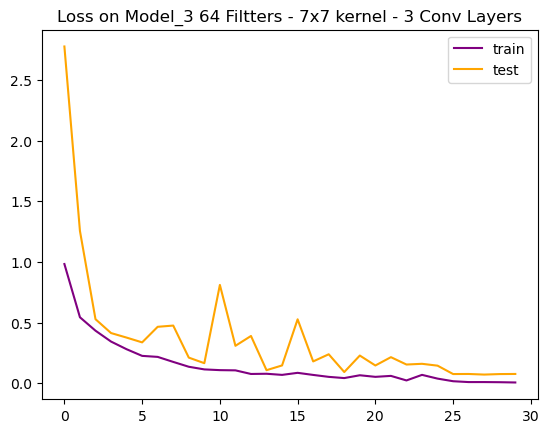

In [7]:
fig, ax = plt.subplots()
ax.plot(history3.history["loss"],c = "purple")
ax.plot(history3.history["val_loss"],c = "orange")
ax.legend(["train", "test"])
ax.set_title('Loss on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

Text(0.5, 1.0, 'Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

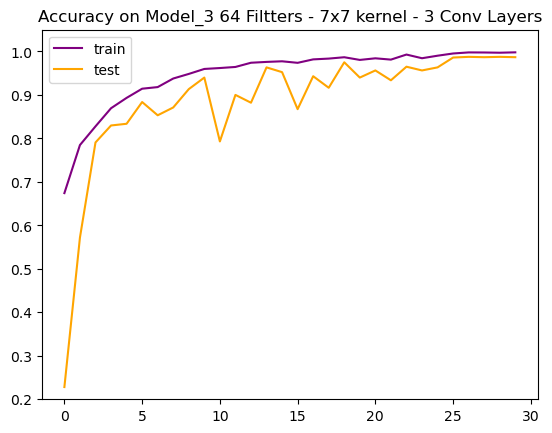

In [8]:
fig, ax = plt.subplots()
ax.plot(history3.history["categorical_accuracy"],c = "purple")
ax.plot(history3.history["val_categorical_accuracy"],c = "orange")
ax.set_ylim([0.2,1.05])
ax.legend(["train", "test"])
ax.set_title('Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

In [9]:
# Load the image to predict
img = load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0001.jpg', target_size=(64, 64), color_mode='grayscale')

# Convert the image to a numpy array
img_arr = img_to_array(img)

# Expand the dimensions of the image to match the input shape of the model
img_arr = img_arr.reshape((1,) + img_arr.shape)

# Preprocess the image using the generator used for training
generator = ImageDataGenerator(rescale=1./255)
img_arr = generator.standardize(img_arr)

# Generate the prediction for the image
prediction = model3.predict(img_arr)

# Print the predicted class
predicted_class = prediction.argmax()
preed={0:"Glioma",1:"Meningioma",2:"No Tumor",3:"Pitutary"}
print('Predicted class:', preed[predicted_class])

1/1 [==============================] - 0s 253ms/step
Predicted class: Pitutary


In [10]:
# Load the trained model from a file
model = load_model('/kaggle/working/model3_weights.h5')

# Evaluate the model on a given dataset
eval_metrics = model.evaluate(test)

# Print the evaluation metrics
loss = eval_metrics[0]
accuracy = eval_metrics[1]
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

41/41 [==============================] - 5s 112ms/step - loss: 0.0799 - categorical_accuracy: 0.9863
Test Loss: 0.07989450544118881
Test Accuracy: 0.986270010471344
